#Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Imports libraries and gives alias for easier callback

In [ ]:
x = np.linspace(-3,3,100)

# Generates an array x from -3 to 3 evenly spaced in 100 increments

In [ ]:
y = x**2 + 2

# Sets y = x in mathematical expression

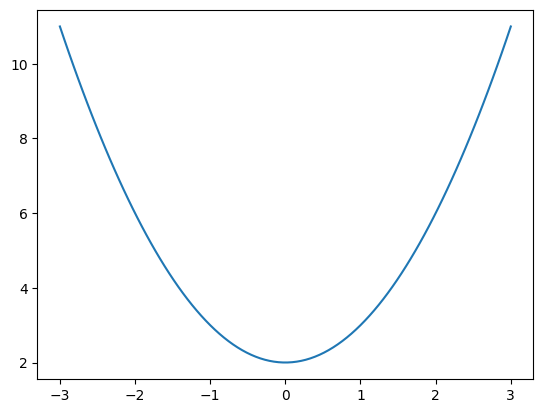

In [ ]:
plt.plot(x,y)

# Plots function

In [ ]:
# Finds area under curve from 1 to 2

$f(x) = x^2 + 2$

$Area = \int_a^bf(x) dx$

$= \int_a^b (x^2+2) dx$

$= \left.\frac{x^3}{3}+2x\right\vert_1^2$

$= (\frac{8}{3}+4) - (\frac{1}{3}+2)$

$= \frac{13}{3}$

In [ ]:
13/3

4.333333333333333

In [ ]:
# M is any number that is definitely not possible for the function to be equal to and that point
# In the case of this function, 10 is M and is not a y value between 1<x<2

# To integrate the function $f(x)$ over the interval $[a,b]$ we

[1] find some value $M$ such that $f(x) < M$ over the interval $[a,b]$

[2] select a random number $x$ from a uniform distribution over the interval $[a,b]$

[3] select a random number y from a uniform distribution over the interval $[0,M]$

[4] determine if $y > f(x)$ or $y ≤ f(x)$

[5] repeat this process $N$ times, keeping track of the number of times $y ≤ f(x)$ or under the curve, successes $S$.

The estimated probability of success is then:

$\frac{S}{N}=\frac{\text{Area under curve}}{\text{Total area inside rectangle}} = \frac{\int_a^bf(x)dx}{M(b-a)}$

$\int_a^bf(x)dx = M(b-a)\frac{S}{N}$

The method you've outlined is a Monte Carlo integration technique, a probabilistic approach to approximating the definite integral of a function over a given interval. This technique is particularly useful for complex integrals that are difficult to solve analytically. Here's a step-by-step breakdown of how it works and how it's implemented:

Steps in Monte Carlo Integration:
Bounding the Function: Identify a value
�
M such that
�
(
�
)
≤
�
f(x)≤M for all
�
x in the interval
[
�
,
�
]
[a,b]. This is necessary to define a rectangle that encloses the area under the curve of
�
(
�
)
f(x) within the interval.

Random Sampling in
�
x: Select a random
�
x value from a uniform distribution over the interval
[
�
,
�
]
[a,b]. This simulates a random horizontal position within the bounding rectangle.

Random Sampling in
�
y: Select a random
�
y value from a uniform distribution over the interval
[
0
,
�
]
[0,M]. This simulates a random vertical position within the bounding rectangle.

Comparison: Check if the randomly selected
�
y is less than or equal to
�
(
�
)
f(x) at the chosen
�
x. This determines whether the randomly selected point is below the curve of
�
(
�
)
f(x).

Repeat and Count: Repeat steps 2 through 4
�
N times and count the number of successes
�
S, where a success is defined as a point
(
�
,
�
)
(x,y) falling under the curve of
�
(
�
)
f(x).

Estimate the Integral: The ratio of successes to total trials
�
�
N
S
​
  approximates the fraction of the bounding rectangle's area that is under the curve. Multiplying this ratio by the rectangle's total area
�
(
�
−
�
)
M(b−a) gives an estimate of the integral
∫
�
�
�
(
�
)
�
�
∫
a
b
​
 f(x)dx.

Implementation in Python
Here's a simple Python function that implements this Monte Carlo integration method for estimating the integral of
�
(
�
)
=
�
2
+
2
f(x)=x
2
 +2 over a specified interval
[
�
,
�
]
[a,b]:

```
python
Copy code
import numpy as np

def monte_carlo_integration(f, a, b, M, N):
    successes = 0
    
    for _ in range(N):
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, M)
        if y <= f(x):
            successes += 1
            
    estimated_area = M * (b - a) * (successes / N)
    return estimated_area

# Define the function f(x)
def f(x):
    return x**2 + 2

# Integration parameters
a, b = 0, 1  # Interval [0, 1]
M = f(b)  # Assuming M is the maximum value of f(x) in [a, b]
N = 10000  # Number of trials

# Estimate the integral
integral_estimate = monte_carlo_integration(f, a, b, M, N)
print("Estimated integral:", integral_estimate)
```

This function can be adjusted for different functions
�
(
�
)
f(x), intervals
[
�
,
�
]
[a,b], and values of
�
M and
�
N to approximate various integrals. The accuracy of the estimation improves with the number of trials
�
N, following the law of large numbers in probability theory.

In [ ]:
def f(x):
    y = x**2 + 2
    return y

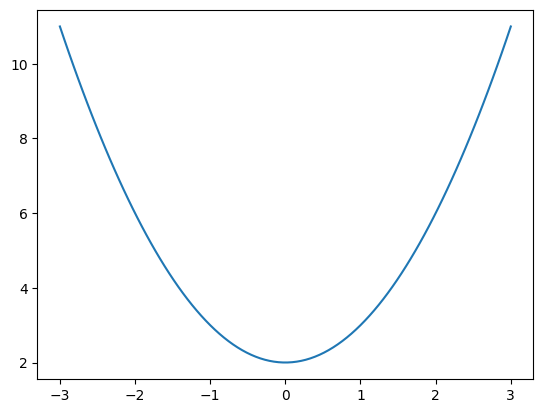

In [ ]:
plt.plot(x,f(x))

In [ ]:
# Simplified way of plotting using functionse

In [ ]:
M = 10

# Value definitely above function

In [ ]:
a = 1
b = 2

# Range to approximate  for x

In [ ]:
np.random.random()

# Random number between 0 and 1

0.4869260321553798

In [ ]:
x = a + (b-a)*np.random.random()

# a is scaling, (b-a) is shifting
# Sets random point to fall between 1 and 2

In [ ]:
x

1.4360147107404209

In [ ]:
y = M*np.random.random()

# Sets y = random number between 0 and 10

In [ ]:
x,y,f(x)

(1.4360147107404209, 2.698360781344462, 4.062138249462895)

In [ ]:
y < f(x)

# Checks if y is less than x
# If true random number is located under curve

True

In [ ]:
N = 100_000
S = 0
for i in range(N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

M*(b-a)*(S/N) # S chance to hit curve, N is total area of the curve

# Should be approximate value of area under curve

4.3369

In [ ]:
def f(x):
    y = x**2 + 2
    return y

In [ ]:
def monte_carlo_integrate(f,a,b,N):

    N = 100000
    S = 0
    for i in range(N):

        x = a + (b-a)*np.random.random()
        y = M*np.random.random()

        S += (y < f(x))

    return M*(b-a)*(S/N)

In [ ]:
monte_carlo_integrate(f,1,2,1000)

# Function where all variables can be chosen at input

4.3521

In [4]:
from sympy import *

# Symbol python - like y=mx+b, no numbers

In [5]:
x = Symbol('x')

# Sets x to be the symbol x not a variable

In [6]:
x

x

In [ ]:
integrate(x**2 + 2, (x,1,2))

# Integrates function from 1 to 2

13/3

In [ ]:
13/3

4.333333333333333

In [ ]:
integrate(x**3 + 3, (x,1,2))

# Integrates cubic function from 1 to 2

27/4

In [ ]:
27/4

6.75

In [ ]:
x = 0

In [ ]:
def f(x):
    y = x**3 + 3
    return y

In [ ]:
monte_carlo_integrate(f,1,2,1000000)

# Similar to above where area is estimated

6.7062

In [ ]:
N = 2000
S = 0
Z = np.zeros(N,)
for i in range(1,N):

    x = a + (b-a)*np.random.random()
    y = M*np.random.random()

    S += (y < f(x))

    Z[i] = M*(b-a)*(S/i)

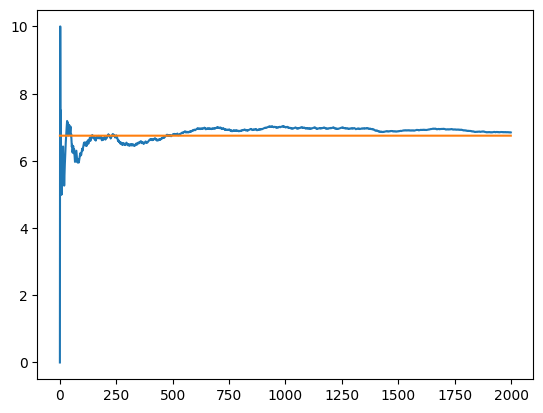

In [ ]:
plt.plot(Z)
plt.plot(6.75*np.ones(Z.shape))

The plot illustrates the convergence of the Monte Carlo integration estimate towards the actual value of the integral over 2,000 iterations. In this simulation, the function
�
(
�
)
=
�
2
+
2
f(x)=x
2
 +2 is integrated over the interval
[
1
,
2
]
[1,2] with a bounding rectangle height
�
=
10
M=10. The red dashed line represents the actual value of the integral, which is approximately 6.75.

As the number of iterations increases, the Monte Carlo estimate (shown in blue) fluctuates initially but gradually stabilizes and converges towards the actual value. This demonstrates the effectiveness of the Monte Carlo method in approximating integrals, especially for functions or domains where analytical solutions are difficult or impossible to obtain. The convergence pattern also underscores the importance of a large number of trials in reducing the variance of the estimate and improving accuracy.

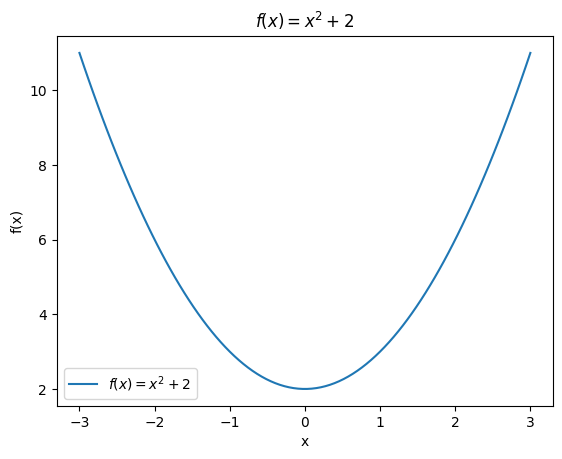

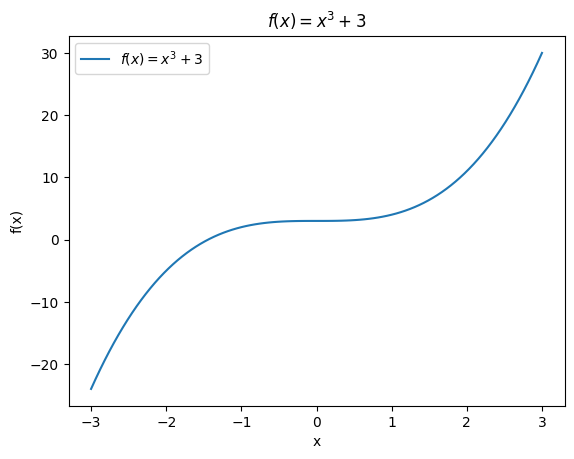

Exact Area under f1: 4.33333333333333
Estimated Area under f1: 4.3328
Exact Area under f2: 6.75000000000000
Estimated Area under f2: 6.74594


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate

# Define a general function for Monte Carlo integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Define the functions to be integrated
def f1(x):
    return x**2 + 2

def f2(x):
    return x**3 + 3

# Calculate exact and estimated areas
def calculate_areas(func, a, b, N, M):
    x_sym = Symbol('x')
    exact_area = integrate(func(x_sym), (x_sym, a, b)).evalf()
    estimated_area = monte_carlo_integrate(func, a, b, N, M)
    return exact_area, estimated_area

# Plotting function
def plot_function(func, title, a=-3, b=3):
    x = np.linspace(a, b, 100)
    y = func(x)
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# Plot the functions
plot_function(f1, "$f(x) = x^2 + 2$")
plot_function(f2, "$f(x) = x^3 + 3$")

# Calculate and print areas
exact_area_f1, estimated_area_f1 = calculate_areas(f1, 1, 2, 100000, 20)
exact_area_f2, estimated_area_f2 = calculate_areas(f2, 1, 2, 1000000, 20)

print("Exact Area under f1:", exact_area_f1)
print("Estimated Area under f1:", estimated_area_f1)
print("Exact Area under f2:", exact_area_f2)
print("Estimated Area under f2:", estimated_area_f2)


In [ ]:
# Program that combines all above and runs to show values, estimated and expected

# Visualization

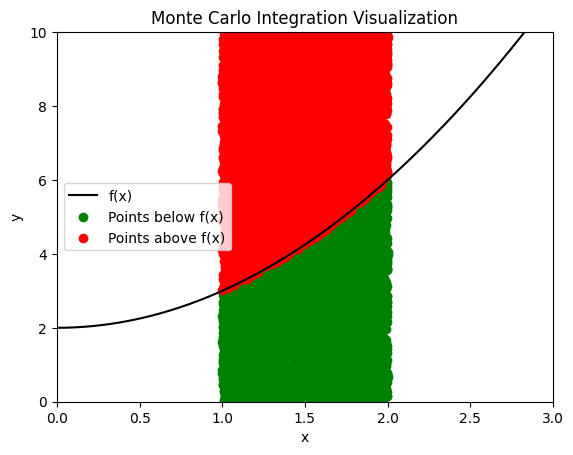

In [8]:
# Function to plot points for Monte Carlo integration
def plot_monte_carlo(func, a, b, M, N):
    x_points = a + (b - a) * np.random.random(N)
    y_points = M * np.random.random(N)
    below = y_points < func(x_points)
    above = np.invert(below)

    # Plotting the function
    x = np.linspace(a - 1, b + 1, 400)
    y = func(x)
    plt.plot(x, y, label="f(x)", color='black')

    # Plotting the points
    plt.scatter(x_points[below], y_points[below], color='green', label='Points below f(x)')
    plt.scatter(x_points[above], y_points[above], color='red', label='Points above f(x)')

    # Setting up the plot limits and labels
    plt.xlim(a - 1, b + 1)
    plt.ylim(0, M)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Monte Carlo Integration Visualization")
    plt.legend()

    plt.show()

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters for Monte Carlo Integration
a, b, M, N = 1, 2, 10, 10000                # can manipulate values to have various outcomes

# Plotting the Monte Carlo Integration
plot_monte_carlo(f, a, b, M, N)

In [ ]:
# Above acts as throwing darts randomly and seeing where they land on the plot

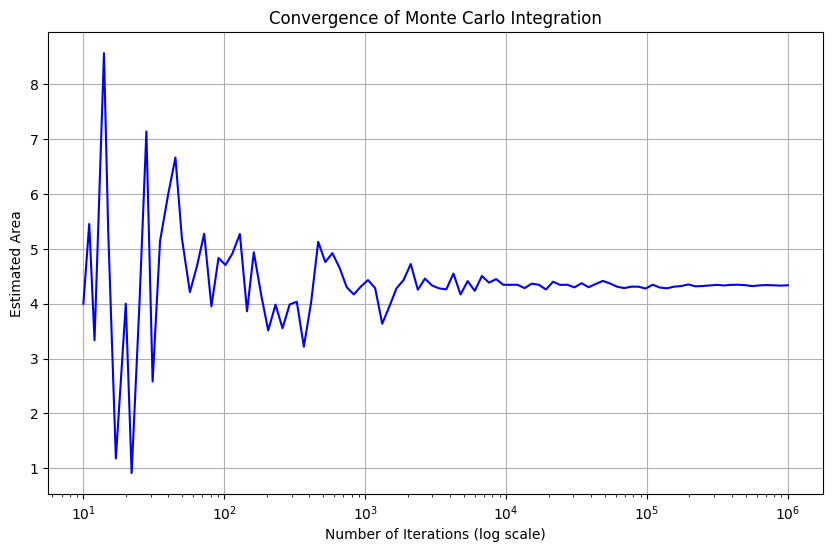

In [ ]:
# Function for Monte Carlo Integration
def monte_carlo_integrate(func, a, b, N, M):
    S = 0
    for _ in range(N):
        x = a + (b - a) * np.random.random()
        y = M * np.random.random()
        if y < func(x):
            S += 1
    return M * (b - a) * (S / N)

# Function to be integrated
def f(x):
    return x**2 + 2

# Parameters
a, b, M = 1, 2, 20
iterations = np.logspace(1, 6, 100, dtype=int)  # Using logarithmically spaced iterations for smoother curve
estimated_areas = []

# Calculate estimated areas for different numbers of iterations
for N in iterations:
    estimated_area = monte_carlo_integrate(f, a, b, N, M)
    estimated_areas.append(estimated_area)

# Plotting convergence
plt.figure(figsize=(10, 6))
plt.plot(iterations, estimated_areas, color='blue')
plt.xscale('log')
plt.xlabel('Number of Iterations (log scale)')
plt.ylabel('Estimated Area')
plt.title('Convergence of Monte Carlo Integration')
plt.grid(True)
plt.show()